In [2]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits import mplot3d
from scipy import stats
%matplotlib inline

# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
import pandas_profiling as pp

# models
from sklearn.linear_model import LinearRegression,LogisticRegression, SGDRegressor, RidgeCV
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor
import sklearn.model_selection
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import pearsonr

import xgboost as xgb
import lightgbm as lgb

# model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

import warnings
warnings.filterwarnings("ignore")

In [126]:
# pd.set_option('display.max_rows', df.shape[0]+1)
pd.set_option('display.max_rows', 15)

In [10]:
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']

In [5]:
df = pd.read_csv('./data_mod_1.csv')
# train0 = train0[features]
# train0.head(5)

In [33]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country',
       'Unnamed: 17'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4551 entries, 0 to 4550
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4551 non-null   float64
 1   bedrooms       4551 non-null   int64  
 2   bathrooms      4551 non-null   float64
 3   sqft_living    4551 non-null   int64  
 4   sqft_lot       4551 non-null   int64  
 5   floors         4551 non-null   float64
 6   waterfront     4551 non-null   int64  
 7   view           4551 non-null   int64  
 8   condition      4551 non-null   int64  
 9   sqft_above     4551 non-null   int64  
 10  sqft_basement  4551 non-null   int64  
 11  yr_built       4551 non-null   int64  
 12  yr_renovated   4551 non-null   int64  
 13  street         4551 non-null   object 
 14  city           4551 non-null   object 
 15  statezip       4551 non-null   object 
 16  country        4551 non-null   object 
 17  Unnamed: 17    1 non-null      object 
dtypes: float

In [25]:
df['price']

0       309620.0
1       625000.0
2       600000.0
3       460000.0
4       575000.0
          ...   
4546    627000.0
4547    754800.0
4548    435000.0
4549    735000.0
4550    693000.0
Name: price, Length: 4551, dtype: float64

In [35]:
df[0:3]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Unnamed: 17
0,309620.0,3,2.5,1860,3730,2.0,0,0,3,1860,0,2012,1912,1 View Ln NE,Duvall,WA 98019,USA,NaN
1,625000.0,3,3.0,1820,1641,3.0,0,0,3,1540,280,2006,0,10 W Etruria St,Seattle,WA 98119,USA,NaN
2,600000.0,2,1.0,910,2002,1.5,0,0,3,910,0,1900,2005,100 20th Ave E,Seattle,WA 98112,USA,NaN


In [36]:
df_ = df.iloc[:, 0:4]

In [38]:
df_.describe()

,price,bedrooms,bathrooms,sqft_living
count,4.551000e+03,4551.000000,4551.000000,4551.000000
mean,5.579059e+05,3.394639,2.155021,2132.372226
std,5.639299e+05,0.904595,0.776351,955.949708
min,7.800000e+03,0.000000,0.000000,370.000000
25%,3.262643e+05,3.000000,1.750000,1460.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000
max,2.659000e+07,9.000000,8.000000,13540.000000


In [40]:
df_.isnull().sum()  # great. use the original later and drop the nas.

price          0
bedrooms       0
bathrooms      0
sqft_living    0
dtype: int64

### Exploring the Data

In [110]:
#  df_1 = df.loc[:, ('city', 'statezip', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'price')] 
df_1 = df.loc[:, ('city', 'statezip', 'price')] 
df_1

,city,statezip,price
0,Duvall,WA 98019,309620.0
1,Seattle,WA 98119,625000.0
2,Seattle,WA 98112,600000.0
3,Seattle,WA 98112,460000.0
4,Issaquah,WA 98027,575000.0
...,...,...,...
4546,Issaquah,WA 98027,627000.0
4547,Redmond,WA 98053,754800.0
4548,Bothell,WA 98011,435000.0
4549,Sammamish,WA 98075,735000.0


In [111]:
df_1_sample = df_1.sample(frac=0.01, random_state=1)

In [112]:
df_1_sample.describe().round(1)

,price
count,46.0
mean,547069.5
std,218260.3
min,185000.0
25%,421250.0
50%,520750.0
75%,661250.0
max,1270000.0


In [113]:
grouped_by_city = df_1.groupby(['city'])
grouped_by_city.describe().round(1)

price                                             \
                      count       mean        std       min        25%   
city                                                                     
Algona                  5.0   207288.0    64798.0  100000.0   196440.0   
Auburn                175.0   301051.0   128904.0   87500.0   224250.0   
Beaux Arts Village      1.0   745000.0        NaN  745000.0   745000.0   
Bellevue              281.0   862255.1   587972.6  248000.0   540000.0   
Black Diamond           8.0   382056.2   164825.4  224000.0   248487.5   
Bothell                33.0   481441.9    98892.0  347000.0   420000.0   
Burien                 72.0   358640.2   209654.5  100000.0   214000.0   
Carnation              22.0   508752.0   332710.9   80000.0   301000.0   
Clyde Hill              9.0  1615711.1   927005.6  927000.0  1110000.0   
Covington              42.0   303283.5   309935.9   83300.0   220112.5   
Des Moines             58.0   304992.5   156312.0  140000.0   210000.0   
Duvall                 42.0   403994.1   141013.6  117833.3   323125.0   
Enumclaw               27.0   319007.7   151571.3  107500.0   219000.0   
Fall City              11.0   692681.8   462670.4  275000.0   385000.0   
Federal Way           145.0   295885.4   112418.9  120750.0   225000.0   
Inglewood-Finn Hill     1.0   425000.0        NaN  425000.0   425000.0   
Issaquah              186.0   599368.9   242377.5  195000.0   475750.0   
Kenmore                65.0   454378.6   129380.6  238750.0   379950.0   
Kent                  184.0   441881.0  1940131.8  100000.0   250000.0   
Kirkland              187.0   651583.6   369847.2   90000.0   430000.0   
Lake Forest Park       34.0   474855.9   115702.1  260000.0   406250.0   
Maple Valley           95.0   340016.8   100971.2  108333.3   275000.0   
Medina                 11.0  2046559.1   921786.9  188000.0  1605000.0   
Mercer Island          82.0  1178638.0   639892.9  435000.0   796250.0   
Milton                  2.0   285000.0    49497.5  250000.0   267500.0   
Newcastle              33.0   666046.7   236942.9  339900.0   500000.0   
Normandy Park          17.0   536604.4   285772.6  192000.0   390000.0   
North Bend             50.0   399565.7   116556.1  240000.0   298000.0   
Pacific                 6.0   225233.3    32194.5  174000.0   216250.0   
Preston                 2.0   562450.0   173311.9  439900.0   501175.0   
Ravensdale              7.0   514071.4   207962.4  225000.0   370000.0   
Redmond               235.0   667649.5   233482.5  170000.0   542250.0   
Renton                291.0   379632.3   149819.4  100000.0   287700.0   
Sammamish             171.0   702985.8   249903.5  237333.3   560100.0   
SeaTac                 28.0   254051.0    85554.4  110700.0   213750.0   
Seattle              1561.0   584294.9   461700.9   90000.0   371000.0   
Shoreline             123.0   420392.4   242451.8  176225.0   300000.0   
Skykomish               3.0   233000.0   157819.5  134000.0   142000.0   
Snoqualmie             69.0   551850.4   168435.4  235000.0   435000.0   
Snoqualmie Pass         1.0   525000.0        NaN  525000.0   525000.0   
Tukwila                29.0   308290.1   355458.9    7800.0   206000.0   
Vashon                 29.0   472556.9   165272.9  160000.0   363750.0   
Woodinville           114.0   614912.1   246982.8  250000.0   450000.0   
Yarrow Point            4.0  1194837.5   877419.6   84350.0   695337.5   

                                                       
                           50%        75%         max  
city                                                   
Algona                230000.0   248000.0    262000.0  
Auburn                276000.0   334189.0    900000.0  
Beaux Arts Village    745000.0   745000.0    745000.0  
Bellevue              725000.0  1000000.0   7062500.0  
Black Diamond         326500.0   515375.0    650000.0  
Bothell               458000.0   540000.0    749995.0  
Burien                287475.0   443750

Exploring some of the cities, we can see that the Seattle city has an average home price of approximately $584,000. 

Medina, Mercer Island, Yarrow Point are all in the big baller club (affluent neighbourhoods). 

Algona has the least expensive homes.

In [121]:
grouped_by_state = df_1.groupby(['statezip'])
grouped_by_state.describe().round(1)

price                                                        \
          count       mean        std       min        25%        50%   
statezip                                                                
WA 98001   66.0   261639.9    91372.1  100000.0   201175.0   246500.0   
WA 98002   35.0   229934.4    46337.3   87500.0   205500.0   229500.0   
WA 98003   48.0   299425.6   133918.7  156000.0   220737.5   256250.0   
WA 98004   71.0  1372758.4   968619.9   84350.0   885000.0  1100000.0   
WA 98005   29.0   778779.2   275796.3  497333.3   625000.0   729032.0   
WA 98006  109.0   800328.3   328971.3  248000.0   550000.0   746000.0   
WA 98007   38.0   655921.9   222596.2  330000.0   509250.0   590000.0   
WA 98008   48.0   628086.6   381730.0  300000.0   454500.0   526500.0   
WA 98010    8.0   382056.2   164825.4  224000.0   248487.5   326500.0   
WA 98011   32.0   483518.2    99740.8  347000.0   423750.0   458000.0   
WA 98014   22.0   508752.0   332710.9   80000.0   301000.0   432175.0   
WA 98019   42.0   403994.1   141013.6  117833.3   323125.0   402750.0   
WA 98022   27.0   319007.7   151571.3  107500.0   219000.0   289000.0   
WA 98023   93.0   293485.0   101786.5  120750.0   225279.4   265000.0   
WA 98024   11.0   692681.8   462670.4  275000.0   385000.0   563500.0   
WA 98027   95.0   581750.0   239887.2  195000.0   436250.0   555000.0   
WA 98028   66.0   453781.9   128473.0  238750.0   379962.5   432045.0   
WA 98029   88.0   618453.1   248950.5  288790.0   491433.5   563000.0   
WA 98030   41.0   279973.9    80917.7  132250.0   239900.0   266000.0   
WA 98031   66.0   682613.5  3238511.1  132500.0   250437.5   268971.9   
WA 98032   21.0   261342.5    66655.8  100000.0   234000.0   260000.0   
WA 98033   89.0   816408.5   375731.2  285000.0   556000.0   750000.0   
WA 98034   99.0   501119.0   292965.3   90000.0   396000.0   449500.0   
WA 98038   95.0   340016.8   100971.2  108333.3   275000.0   321000.0   
WA 98039   11.0  2046559.1   921786.9  188000.0  1605000.0  2100000.0   
WA 98040   82.0  1178638.0   639892.9  435000.0   796250.0   950466.7   
WA 98042   98.0   326779.6   218415.8   83300.0   243675.0   290500.0   
WA 98045   50.0   399565.7   116556.1  240000.0   298000.0   394250.0   
WA 98047    6.0   225233.3    32194.5  174000.0   216250.0   221200.0   
WA 98050    2.0   562450.0   173311.9  439900.0   501175.0   562450.0   
WA 98051    7.0   514071.4   207962.4  225000.0   370000.0   499000.0   
WA 98052  135.0   637555.7   188082.0  259950.0   538500.0   605000.0   
WA 98053   98.0   708179.8   281891.7  170000.0   564250.0   678549.8   
WA 98055   28.0   327850.0   118113.7  129000.0   246250.0   316250.0   
WA 98056   81.0   411971.4   170683.6  127160.0   280000.0   400000.0   
WA 98057   14.0   279108.3   144864.0  100000.0   178125.0   241500.0   
WA 98058   95.0   347928.8   127353.0  137124.0   289250.0   327500.0   
WA 98059  106.0   499455.8   209070.4  232333.3   349250.0   451750.0   
WA 98065   69.0   551850.4   168435.4  235000.0   435000.0   536751.0   
WA 98068    1.0   525000.0        NaN  525000.0   525000.0   525000.0   
WA 98070   29.0   472556.9   165272.9  160000.0   363750.0   445000.0   
WA 98072   63.0   578530.0   219891.1  278900.0   420000.0   525000.0   
WA 98074   94.0   639403.6   176219.0  341750.0   531250.0   620500.0   
WA 98075   82.0   772257.7   294289.6  237333.3   618750.0   723250.0   
WA 98077   51.0   659854.7   272353.6  250000.0   482750.0   646212.5   
WA 98092   83.0   357123.7   148899.4  148226.0   280000.0   325000.0   
WA 98102   23.0   742405.7   397444.5  399950.0   502475.0   660000.0   
WA 98103  148.0   578663.1   203072.3  310000.0   441312.5   532000.0   
WA 98105   48.0   932701.8   480504.9  362750.0   580000.0   756800.5   
WA 98106   66.0   297214.6    88186.6  102500.0   245000.0   307000.0   
WA 98107   58.0   572687.2   279988.4  373500.0   460000.0   515000.0   
WA 98108   44.0   344297.0   101900.3  155000.0   264750.0   336250.

notice that WA 98103 has the most counts. WA 98103 has 148 samples, we will further explore this below.

In [120]:
grouped_by_state_and_city = df_1.groupby(['city', 'statezip'])
grouped_by_state_and_city.describe().round(1)

price                                  \
                              count       mean        std       min   
city                statezip                                          
Algona              WA 98001    5.0   207288.0    64798.0  100000.0   
Auburn              WA 98001   57.0   263069.3    92581.0  115000.0   
                    WA 98002   35.0   229934.4    46337.3   87500.0   
                    WA 98092   83.0   357123.7   148899.4  148226.0   
Beaux Arts Village  WA 98004    1.0   745000.0        NaN  745000.0   
Bellevue            WA 98004   57.0  1357896.4   994869.7  530000.0   
                    WA 98005   29.0   778779.2   275796.3  497333.3   
                    WA 98006  109.0   800328.3   328971.3  248000.0   
                    WA 98007   38.0   655921.9   222596.2  330000.0   
                    WA 98008   48.0   628086.6   381730.0  300000.0   
Black Diamond       WA 98010    8.0   382056.2   164825.4  224000.0   
Bothell             WA 98011   32.0   483518.2    99740.8  347000.0   
                    WA 98028    1.0   415000.0        NaN  415000.0   
Burien              WA 98146    8.0   347625.0   217861.6  150000.0   
                    WA 98148   10.0   334945.0   105450.7  193000.0   
                    WA 98166   41.0   413836.9   236660.0  100000.0   
                    WA 98168   13.0   209564.1    48093.3  150000.0   
Carnation           WA 98014   22.0   508752.0   332710.9   80000.0   
Clyde Hill          WA 98004    9.0  1615711.1   927005.6  927000.0   
Covington           WA 98042   42.0   303283.5   309935.9   83300.0   
Des Moines          WA 98148    5.0   272240.0    28628.4  245000.0   
                    WA 98198   53.0   308082.4   163116.2  140000.0   
Duvall              WA 98019   42.0   403994.1   141013.6  117833.3   
Enumclaw            WA 98022   27.0   319007.7   151571.3  107500.0   
Fall City           WA 98024   11.0   692681.8   462670.4  275000.0   
Federal Way         WA 98001    4.0   309210.2    85541.2  229950.0   
                    WA 98003   48.0   299425.6   133918.7  156000.0   
                    WA 98023   93.0   293485.0   101786.5  120750.0   
Inglewood-Finn Hill WA 98034    1.0   425000.0        NaN  425000.0   
Issaquah            WA 98027   95.0   581750.0   239887.2  195000.0   
                    WA 98029   88.0   618453.1   248950.5  288790.0   
                    WA 98075    3.0   597500.0    51795.3  544500.0   
Kenmore             WA 98028   65.0   454378.6   129380.6  238750.0   
Kent                WA 98030   41.0   279973.9    80917.7  132250.0   
                    WA 98031   66.0   682613.5  3238511.1  132500.0   
                    WA 98032   21.0   261342.5    66655.8  100000.0   
                    WA 98042   56.0   344401.6   108576.1  120000.0   
Kirkland            WA 98033   89.0   816408.5   375731.2  285000.0   
                    WA 98034   98.0   501895.7   294369.1   90000.0   
Lake Forest Park    WA 98155   34.0   474855.9   115702.1  260000.0   
Maple Valley        WA 98038   95.0   340016.8   100971.2  108333.3   
Medina              WA 98039   11.0  2046559.1   921786.9  188000.0   
Mercer Island       WA 98040   82.0  1178638.0   639892.9  435000.0   
Milton              WA 98354    2.0   285000.0    49497.5  250000.0   
Newcastle           WA 98056   18.0   527855.3   122212.8  339900.0   
                    WA 98059   15.0   831876.4   237004.2  500000.0   
Normandy Park       WA 98166   16.0   541704.7   294344.5  192000.0   
                    WA 98198    1.0   455000.0        NaN  455000.0   
North Bend          WA 98045   50.0   399565.7   116556.1  240000.0   
Pacific             WA 98047    6.0   225233.3    32194.5  174000.0   
Preston             WA 98050    2.0   562450.0   173311.9  439900.0   
Ravensdale          WA 98051    7.0   514071.4   207962.4  225000.0   
Redmond             WA 98052  135.0   637555.7   188082.0  259950.0   
                    WA 98053   98.0   708179.8   28189

In [131]:
df_2 = df.loc[:, ('city', 'bedrooms', 'price')]
df_2

,city,bedrooms,price
0,Duvall,3,309620.0
1,Seattle,3,625000.0
2,Seattle,2,600000.0
3,Seattle,2,460000.0
4,Issaquah,3,575000.0
...,...,...,...
4546,Issaquah,3,627000.0
4547,Redmond,2,754800.0
4548,Bothell,3,435000.0
4549,Sammamish,5,735000.0


In [132]:
grouped_by_city_and_bedroom = df_2.groupby(['city', 'bedrooms'])
grouped_by_city_and_bedroom.describe().round(1)

price                                             \
                      count       mean       std        min        25%   
city         bedrooms                                                    
Algona       2          1.0   100000.0       NaN   100000.0   100000.0   
             3          2.0   213220.0   23730.5   196440.0   204830.0   
             4          2.0   255000.0    9899.5   248000.0   251500.0   
Auburn       1          1.0   115000.0       NaN   115000.0   115000.0   
             2         13.0   245892.3  106306.2    87500.0   189000.0   
...                     ...        ...       ...        ...        ...   
Woodinville  5          6.0   711000.0  210236.3   480000.0   517125.0   
             6          1.0  1135000.0       NaN  1135000.0  1135000.0   
Yarrow Point 3          2.0  1400000.0  708521.0   899000.0  1149500.0   
             4          1.0    84350.0       NaN    84350.0    84350.0   
             5          1.0  1895000.0       NaN  1895000.0  1895000.0   

                                                        
                             50%        75%        max  
city         bedrooms                                   
Algona       2          100000.0   100000.0   100000.0  
             3          213220.0   221610.0   230000.0  
             4          255000.0   258500.0   262000.0  
Auburn       1          115000.0   115000.0   115000.0  
             2          214100.0   270000.0   475000.0  
...                          ...        ...        ...  
Woodinville  5          727000.0   882875.0   950000.0  
             6         1135000.0  1135000.0  1135000.0  
Yarrow Point 3         1400000.0  1650500.0  1901000.0  
             4           84350.0    84350.0    84350.0  
             5         1895000.0  1895000.0  1895000.0  

[189 rows x 8 columns]

In [133]:
df_3 = df.loc[:, ('city', 'condition', 'price')]
df_3

,city,condition,price
0,Duvall,3,309620.0
1,Seattle,3,625000.0
2,Seattle,3,600000.0
3,Seattle,3,460000.0
4,Issaquah,5,575000.0
...,...,...,...
4546,Issaquah,3,627000.0
4547,Redmond,3,754800.0
4548,Bothell,3,435000.0
4549,Sammamish,3,735000.0


In [135]:
grouped_by_city_and_condition = df_3.groupby(['city', 'condition'])
grouped_by_city_and_condition.describe().round(1)

price                                             \
                        count       mean       std        min        25%   
city         condition                                                     
Algona       3            4.0   201610.0   73371.9   100000.0   172330.0   
             4            1.0   230000.0       NaN   230000.0   230000.0   
Auburn       2            2.0   325000.0   14142.1   315000.0   320000.0   
             3          111.0   326396.5  138264.1   132500.0   250000.0   
             4           52.0   256873.2  103494.8    87500.0   199125.0   
...                       ...        ...       ...        ...        ...   
Woodinville  3           74.0   629496.8  254199.5   278900.0   459500.0   
             4           35.0   589520.4  219519.7   306000.0   421062.5   
             5            4.0   658500.0  345686.3   360000.0   438750.0   
Yarrow Point 3            1.0  1901000.0       NaN  1901000.0  1901000.0   
             4            3.0   959450.0  906837.4    84350.0   491675.0   

                                                         
                              50%        75%        max  
city         condition                                   
Algona       3           222220.0   251500.0   262000.0  
             4           230000.0   230000.0   230000.0  
Auburn       2           325000.0   330000.0   335000.0  
             3           299950.0   343500.0   900000.0  
             4           229500.0   280000.0   625000.0  
...                           ...        ...        ...  
Woodinville  3           567500.0   800000.0  1820000.0  
             4           540000.0   675000.0  1157200.0  
             5           567000.0   786750.0  1140000.0  
Yarrow Point 3          1901000.0  1901000.0  1901000.0  
             4           899000.0  1397000.0  1895000.0  

[133 rows x 8 columns]

### Exploring State Zip WA 98103
We're honing into WA 98103 because it has a comfortable amount of samples to work with to apply machine learning, 148 but small enough to feel comfortable working with as opposed to everything at once. Maybe I'll extend my code to the entire Seattle area after..

In [137]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Unnamed: 17
0,309620.0,3,2.50,1860,3730,2.0,0,0,3,1860,0,2012,1912,1 View Ln NE,Duvall,WA 98019,USA,NaN
1,625000.0,3,3.00,1820,1641,3.0,0,0,3,1540,280,2006,0,10 W Etruria St,Seattle,WA 98119,USA,NaN
2,600000.0,2,1.00,910,2002,1.5,0,0,3,910,0,1900,2005,100 20th Ave E,Seattle,WA 98112,USA,NaN
3,460000.0,2,2.25,1230,929,2.0,0,0,3,1020,210,2004,2003,100 24th Ave E,Seattle,WA 98112,USA,NaN
4,575000.0,3,1.75,2680,8625,1.0,0,0,5,1590,1090,1974,0,100 Mt Si Pl NW,Issaquah,WA 98027,USA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4546,627000.0,3,3.50,2710,3475,2.0,0,0,3,1650,1060,2005,0,Shangri-La Way NW,Issaquah,WA 98027,USA,NaN
4547,754800.0,2,2.50,2770,7781,2.0,0,0,3,2770,0,2006,0,Sunrise Loop Trail,Redmond,WA 98053,USA,NaN
4548,435000.0,3,2.50,1900,7984,2.0,0,0,3,1900,0,1993,0,Tolt Pipeline Trail,Bothell,WA 98011,USA,NaN
4549,735000.0,5,2.75,3390,5211,2.0,0,0,3,3390,0,2004,2003,Trossachs Blvd SE,Sammamish,WA 98075,USA,NaN


### State ZIP WA 98103 on the map

<img src="./98103.png">

In [7]:
df_4 = df.loc[ (df['statezip'] == 'WA 98103'), ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'price'] ]
df_4.round(1)

,bedrooms,bathrooms,sqft_living,floors,condition,price
54,4,2.0,1790,1.0,4,475000.0
237,4,1.0,1210,1.5,3,452000.0
338,3,2.5,1770,3.0,3,436110.0
375,4,2.8,2610,3.0,5,650000.0
460,4,1.0,1600,1.5,4,485000.0
...,...,...,...,...,...,...
4468,3,3.2,1410,3.0,3,382000.0
4473,2,1.0,1260,1.0,4,405000.0
4475,2,1.0,1170,1.0,4,455000.0
4476,2,2.5,1260,3.0,3,350000.0


only a couple of the features are picked. WHY? so which features are the most telling of price?

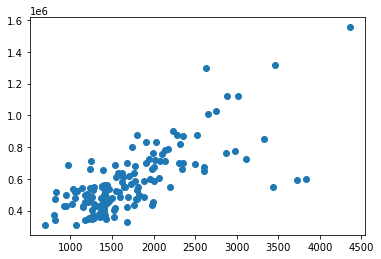

In [11]:
plt.scatter(df_4.sqft_living, df_4.price)

In [542]:
X_ = df_4.sqft_living
X_

54      1790
237     1210
338     1770
375     2610
460     1600
        ... 
4468    1410
4473    1260
4475    1170
4476    1260
4502    1470
Name: sqft_living, Length: 148, dtype: int64

In [543]:
type(X_)  # we don't want a series..

pandas.core.series.Series

In [544]:
X = X_.to_numpy()  # we want a numpy array

In [545]:
type(X)

numpy.ndarray

In [546]:
X

array([1790, 1210, 1770, 2610, 1600,  800, 1030, 2000, 1270, 1440, 2280,
       2020, 1170, 2650, 1680, 1420, 2360, 2880, 1800, 3730, 1060, 3460,
       1430, 2000, 1240, 1200, 1760, 1950, 1250, 1150, 1400, 1630, 1260,
       1400, 1420, 1420, 1780, 1550, 1210, 2030, 1660, 1410, 3330,  970,
        950, 1270, 2180, 1990, 1680, 1540, 1960, 1390, 1980, 1890, 2080,
       2350, 1500, 1380, 1290, 2870,  820, 1690, 1380, 1380, 2060, 2320,
       1250,  820, 1080, 1420, 1550, 2140, 1780, 1620, 2980, 2630, 2100,
       2230, 2750, 1710, 1830, 1370, 1740, 1440, 2520, 4360, 1360, 1210,
       3440, 1800, 1730, 1420, 1430, 1890, 1290, 1020, 2340, 1800, 1910,
       1910, 1240, 1650, 1590, 1570, 1810, 2200, 1430, 3010, 1460, 1620,
        920, 3110, 1990, 2310,  830, 1060, 2140, 1520, 1980, 1310,  950,
       1280, 1410, 1390, 3830, 1270, 1270, 1410, 1370, 1140, 1540, 1175,
       2500, 2610, 1340, 1220, 1680,  700, 1370, 1530, 1070, 1150, 1410,
       1410, 1260, 1170, 1260, 1470], dtype=int64)

In [547]:
X.shape

(148,)

In [71]:
ones = np.ones(len(X))

In [548]:
X_with_ones_col = np.column_stack((ones, X))
X_with_ones_col

array([[1.000e+00, 1.790e+03],
       [1.000e+00, 1.210e+03],
       [1.000e+00, 1.770e+03],
       [1.000e+00, 2.610e+03],
       [1.000e+00, 1.600e+03],
       [1.000e+00, 8.000e+02],
       [1.000e+00, 1.030e+03],
       [1.000e+00, 2.000e+03],
       [1.000e+00, 1.270e+03],
       [1.000e+00, 1.440e+03],
       [1.000e+00, 2.280e+03],
       [1.000e+00, 2.020e+03],
       [1.000e+00, 1.170e+03],
       [1.000e+00, 2.650e+03],
       [1.000e+00, 1.680e+03],
       [1.000e+00, 1.420e+03],
       [1.000e+00, 2.360e+03],
       [1.000e+00, 2.880e+03],
       [1.000e+00, 1.800e+03],
       [1.000e+00, 3.730e+03],
       [1.000e+00, 1.060e+03],
       [1.000e+00, 3.460e+03],
       [1.000e+00, 1.430e+03],
       [1.000e+00, 2.000e+03],
       [1.000e+00, 1.240e+03],
       [1.000e+00, 1.200e+03],
       [1.000e+00, 1.760e+03],
       [1.000e+00, 1.950e+03],
       [1.000e+00, 1.250e+03],
       [1.000e+00, 1.150e+03],
       [1.000e+00, 1.400e+03],
       [1.000e+00, 1.630e+03],
       [

In [549]:
X_with_ones_col.shape

(148, 2)

##### our target: y

In [550]:
y = df_4.price
y = y.to_numpy()
y.shape

(148,)

In [551]:
y

array([ 475000.    ,  452000.    ,  436110.    ,  650000.    ,
        485000.    ,  370000.    ,  535000.    ,  677000.    ,
        531000.    ,  445000.    ,  875000.    ,  720000.    ,
        499000.    , 1008000.    ,  700000.    ,  371000.    ,
        702500.    , 1125000.    ,  875000.    ,  595000.    ,
        480000.    , 1315000.    ,  485000.    ,  585000.    ,
        543000.    ,  504200.    ,  640000.    ,  725000.    ,
        712000.    ,  425000.    ,  563500.    ,  609000.    ,
        485000.    ,  474800.    ,  523950.    ,  510000.    ,
        586500.    ,  526000.    ,  500000.    ,  831000.    ,
        550607.1429,  500000.    ,  850000.    ,  690000.    ,
        500000.    ,  355000.    ,  785000.    ,  760500.    ,
        330000.    ,  690000.    ,  599000.    ,  657100.    ,
        660000.    ,  486895.    ,  715000.    ,  870300.    ,
        480000.    ,  482000.    ,  440000.    ,  765000.    ,
        475000.    ,  487250.    ,  552000.    ,  54900

### Attempt 3

In [552]:
X

array([1790, 1210, 1770, 2610, 1600,  800, 1030, 2000, 1270, 1440, 2280,
       2020, 1170, 2650, 1680, 1420, 2360, 2880, 1800, 3730, 1060, 3460,
       1430, 2000, 1240, 1200, 1760, 1950, 1250, 1150, 1400, 1630, 1260,
       1400, 1420, 1420, 1780, 1550, 1210, 2030, 1660, 1410, 3330,  970,
        950, 1270, 2180, 1990, 1680, 1540, 1960, 1390, 1980, 1890, 2080,
       2350, 1500, 1380, 1290, 2870,  820, 1690, 1380, 1380, 2060, 2320,
       1250,  820, 1080, 1420, 1550, 2140, 1780, 1620, 2980, 2630, 2100,
       2230, 2750, 1710, 1830, 1370, 1740, 1440, 2520, 4360, 1360, 1210,
       3440, 1800, 1730, 1420, 1430, 1890, 1290, 1020, 2340, 1800, 1910,
       1910, 1240, 1650, 1590, 1570, 1810, 2200, 1430, 3010, 1460, 1620,
        920, 3110, 1990, 2310,  830, 1060, 2140, 1520, 1980, 1310,  950,
       1280, 1410, 1390, 3830, 1270, 1270, 1410, 1370, 1140, 1540, 1175,
       2500, 2610, 1340, 1220, 1680,  700, 1370, 1530, 1070, 1150, 1410,
       1410, 1260, 1170, 1260, 1470], dtype=int64)

In [553]:
len(X)

148

In [554]:
X_with_ones_col

array([[1.000e+00, 1.790e+03],
       [1.000e+00, 1.210e+03],
       [1.000e+00, 1.770e+03],
       [1.000e+00, 2.610e+03],
       [1.000e+00, 1.600e+03],
       [1.000e+00, 8.000e+02],
       [1.000e+00, 1.030e+03],
       [1.000e+00, 2.000e+03],
       [1.000e+00, 1.270e+03],
       [1.000e+00, 1.440e+03],
       [1.000e+00, 2.280e+03],
       [1.000e+00, 2.020e+03],
       [1.000e+00, 1.170e+03],
       [1.000e+00, 2.650e+03],
       [1.000e+00, 1.680e+03],
       [1.000e+00, 1.420e+03],
       [1.000e+00, 2.360e+03],
       [1.000e+00, 2.880e+03],
       [1.000e+00, 1.800e+03],
       [1.000e+00, 3.730e+03],
       [1.000e+00, 1.060e+03],
       [1.000e+00, 3.460e+03],
       [1.000e+00, 1.430e+03],
       [1.000e+00, 2.000e+03],
       [1.000e+00, 1.240e+03],
       [1.000e+00, 1.200e+03],
       [1.000e+00, 1.760e+03],
       [1.000e+00, 1.950e+03],
       [1.000e+00, 1.250e+03],
       [1.000e+00, 1.150e+03],
       [1.000e+00, 1.400e+03],
       [1.000e+00, 1.630e+03],
       [

In [555]:
X_with_ones_col.shape

(148, 2)

In [538]:
y

array([ 475000.    ,  452000.    ,  436110.    ,  650000.    ,
        485000.    ,  370000.    ,  535000.    ,  677000.    ,
        531000.    ,  445000.    ,  875000.    ,  720000.    ,
        499000.    , 1008000.    ,  700000.    ,  371000.    ,
        702500.    , 1125000.    ,  875000.    ,  595000.    ,
        480000.    , 1315000.    ,  485000.    ,  585000.    ,
        543000.    ,  504200.    ,  640000.    ,  725000.    ,
        712000.    ,  425000.    ,  563500.    ,  609000.    ,
        485000.    ,  474800.    ,  523950.    ,  510000.    ,
        586500.    ,  526000.    ,  500000.    ,  831000.    ,
        550607.1429,  500000.    ,  850000.    ,  690000.    ,
        500000.    ,  355000.    ,  785000.    ,  760500.    ,
        330000.    ,  690000.    ,  599000.    ,  657100.    ,
        660000.    ,  486895.    ,  715000.    ,  870300.    ,
        480000.    ,  482000.    ,  440000.    ,  765000.    ,
        475000.    ,  487250.    ,  552000.    ,  54900

In [539]:
len(y)

148

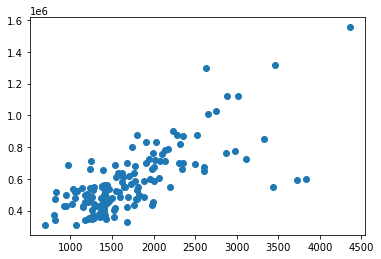

In [557]:
plt.scatter(X, y)

In [533]:
def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [556]:
normal_equation(X_with_ones_col, y)

array([184435.24482113,    229.49521863])

In [ ]:
# the values from the normal equation are not scaled properly

In [559]:
X_scaled = X/100
X_scaled

array([17.9 , 12.1 , 17.7 , 26.1 , 16.  ,  8.  , 10.3 , 20.  , 12.7 ,
       14.4 , 22.8 , 20.2 , 11.7 , 26.5 , 16.8 , 14.2 , 23.6 , 28.8 ,
       18.  , 37.3 , 10.6 , 34.6 , 14.3 , 20.  , 12.4 , 12.  , 17.6 ,
       19.5 , 12.5 , 11.5 , 14.  , 16.3 , 12.6 , 14.  , 14.2 , 14.2 ,
       17.8 , 15.5 , 12.1 , 20.3 , 16.6 , 14.1 , 33.3 ,  9.7 ,  9.5 ,
       12.7 , 21.8 , 19.9 , 16.8 , 15.4 , 19.6 , 13.9 , 19.8 , 18.9 ,
       20.8 , 23.5 , 15.  , 13.8 , 12.9 , 28.7 ,  8.2 , 16.9 , 13.8 ,
       13.8 , 20.6 , 23.2 , 12.5 ,  8.2 , 10.8 , 14.2 , 15.5 , 21.4 ,
       17.8 , 16.2 , 29.8 , 26.3 , 21.  , 22.3 , 27.5 , 17.1 , 18.3 ,
       13.7 , 17.4 , 14.4 , 25.2 , 43.6 , 13.6 , 12.1 , 34.4 , 18.  ,
       17.3 , 14.2 , 14.3 , 18.9 , 12.9 , 10.2 , 23.4 , 18.  , 19.1 ,
       19.1 , 12.4 , 16.5 , 15.9 , 15.7 , 18.1 , 22.  , 14.3 , 30.1 ,
       14.6 , 16.2 ,  9.2 , 31.1 , 19.9 , 23.1 ,  8.3 , 10.6 , 21.4 ,
       15.2 , 19.8 , 13.1 ,  9.5 , 12.8 , 14.1 , 13.9 , 38.3 , 12.7 ,
       12.7 , 14.1 ,

In [560]:
X_scaled_with_ones_col = np.column_stack((np.ones(len(X_scaled)), X_scaled))
X_scaled_with_ones_col

array([[ 1.  , 17.9 ],
       [ 1.  , 12.1 ],
       [ 1.  , 17.7 ],
       [ 1.  , 26.1 ],
       [ 1.  , 16.  ],
       [ 1.  ,  8.  ],
       [ 1.  , 10.3 ],
       [ 1.  , 20.  ],
       [ 1.  , 12.7 ],
       [ 1.  , 14.4 ],
       [ 1.  , 22.8 ],
       [ 1.  , 20.2 ],
       [ 1.  , 11.7 ],
       [ 1.  , 26.5 ],
       [ 1.  , 16.8 ],
       [ 1.  , 14.2 ],
       [ 1.  , 23.6 ],
       [ 1.  , 28.8 ],
       [ 1.  , 18.  ],
       [ 1.  , 37.3 ],
       [ 1.  , 10.6 ],
       [ 1.  , 34.6 ],
       [ 1.  , 14.3 ],
       [ 1.  , 20.  ],
       [ 1.  , 12.4 ],
       [ 1.  , 12.  ],
       [ 1.  , 17.6 ],
       [ 1.  , 19.5 ],
       [ 1.  , 12.5 ],
       [ 1.  , 11.5 ],
       [ 1.  , 14.  ],
       [ 1.  , 16.3 ],
       [ 1.  , 12.6 ],
       [ 1.  , 14.  ],
       [ 1.  , 14.2 ],
       [ 1.  , 14.2 ],
       [ 1.  , 17.8 ],
       [ 1.  , 15.5 ],
       [ 1.  , 12.1 ],
       [ 1.  , 20.3 ],
       [ 1.  , 16.6 ],
       [ 1.  , 14.1 ],
       [ 1.  , 33.3 ],
       [ 1.

In [561]:
X_scaled_with_ones_col.shape

(148, 2)

In [562]:
y_scaled = y/100000
y_scaled

array([ 4.75      ,  4.52      ,  4.3611    ,  6.5       ,  4.85      ,
        3.7       ,  5.35      ,  6.77      ,  5.31      ,  4.45      ,
        8.75      ,  7.2       ,  4.99      , 10.08      ,  7.        ,
        3.71      ,  7.025     , 11.25      ,  8.75      ,  5.95      ,
        4.8       , 13.15      ,  4.85      ,  5.85      ,  5.43      ,
        5.042     ,  6.4       ,  7.25      ,  7.12      ,  4.25      ,
        5.635     ,  6.09      ,  4.85      ,  4.748     ,  5.2395    ,
        5.1       ,  5.865     ,  5.26      ,  5.        ,  8.31      ,
        5.50607143,  5.        ,  8.5       ,  6.9       ,  5.        ,
        3.55      ,  7.85      ,  7.605     ,  3.3       ,  6.9       ,
        5.99      ,  6.571     ,  6.6       ,  4.86895   ,  7.15      ,
        8.703     ,  4.8       ,  4.82      ,  4.4       ,  7.65      ,
        4.75      ,  4.8725    ,  5.52      ,  5.49      ,  6.05      ,
        8.225     ,  4.8       ,  3.3995    ,  5.25      ,  4.55

In [563]:
# lets try the normal equation again

normal_equation(X_scaled_with_ones_col, y_scaled)

array([1.84435245, 0.22949522])

In [ ]:
# thats better

### debugging plot function

In [626]:
steps = np.linspace(-2, 2, 17)
w0, w1 = np.meshgrid(steps, steps)
w0_ = w0.ravel()
w1_ = w1.ravel()
w = np.column_stack([w0_, w1_])
w

array([[-2.  , -2.  ],
       [-1.75, -2.  ],
       [-1.5 , -2.  ],
       [-1.25, -2.  ],
       [-1.  , -2.  ],
       [-0.75, -2.  ],
       [-0.5 , -2.  ],
       [-0.25, -2.  ],
       [ 0.  , -2.  ],
       [ 0.25, -2.  ],
       [ 0.5 , -2.  ],
       [ 0.75, -2.  ],
       [ 1.  , -2.  ],
       [ 1.25, -2.  ],
       [ 1.5 , -2.  ],
       [ 1.75, -2.  ],
       [ 2.  , -2.  ],
       [-2.  , -1.75],
       [-1.75, -1.75],
       [-1.5 , -1.75],
       [-1.25, -1.75],
       [-1.  , -1.75],
       [-0.75, -1.75],
       [-0.5 , -1.75],
       [-0.25, -1.75],
       [ 0.  , -1.75],
       [ 0.25, -1.75],
       [ 0.5 , -1.75],
       [ 0.75, -1.75],
       [ 1.  , -1.75],
       [ 1.25, -1.75],
       [ 1.5 , -1.75],
       [ 1.75, -1.75],
       [ 2.  , -1.75],
       [-2.  , -1.5 ],
       [-1.75, -1.5 ],
       [-1.5 , -1.5 ],
       [-1.25, -1.5 ],
       [-1.  , -1.5 ],
       [-0.75, -1.5 ],
       [-0.5 , -1.5 ],
       [-0.25, -1.5 ],
       [ 0.  , -1.5 ],
       [ 0.

In [627]:
def calculateCostArray(X, y, i):
    return computeCost(X, y, w[i])

In [628]:
def computeCost(X, y, w):
    t = X @ w - y
    t_squared = t * t   # vectorized. element wise squaring
    cost = 1/(2*len(X)) * sum(t_squared)
    return cost

In [629]:
costs = np.zeros(289)
for i in range(289):
    costs[i] = calculateCostArray(X_scaled_with_ones_col, y_scaled, i)
costs

array([9.91242028e+02, 9.80737600e+02, 9.70295672e+02, 9.59916244e+02,
       9.49599316e+02, 9.39344888e+02, 9.29152960e+02, 9.19023532e+02,
       9.08956605e+02, 8.98952177e+02, 8.89010249e+02, 8.79130821e+02,
       8.69313893e+02, 8.59559465e+02, 8.49867537e+02, 8.40238109e+02,
       8.30671181e+02, 7.97830602e+02, 7.88399802e+02, 7.79031501e+02,
       7.69725701e+02, 7.60482401e+02, 7.51301600e+02, 7.42183300e+02,
       7.33127499e+02, 7.24134199e+02, 7.15203399e+02, 7.06335098e+02,
       6.97529298e+02, 6.88785998e+02, 6.80105197e+02, 6.71486897e+02,
       6.62931096e+02, 6.54437796e+02, 6.25433933e+02, 6.17076760e+02,
       6.08782087e+02, 6.00549914e+02, 5.92380241e+02, 5.84273068e+02,
       5.76228396e+02, 5.68246223e+02, 5.60326550e+02, 5.52469377e+02,
       5.44674704e+02, 5.36942531e+02, 5.29272858e+02, 5.21665686e+02,
       5.14121013e+02, 5.06638840e+02, 4.99219167e+02, 4.74052019e+02,
       4.66768474e+02, 4.59547429e+02, 4.52388883e+02, 4.45292838e+02,
      

In [630]:
costs.shape

(289,)

In [632]:
costs = costs.reshape(17, 17, -1)
costs = costs.squeeze()
costs

array([[9.91242028e+02, 9.80737600e+02, 9.70295672e+02, 9.59916244e+02,
        9.49599316e+02, 9.39344888e+02, 9.29152960e+02, 9.19023532e+02,
        9.08956605e+02, 8.98952177e+02, 8.89010249e+02, 8.79130821e+02,
        8.69313893e+02, 8.59559465e+02, 8.49867537e+02, 8.40238109e+02,
        8.30671181e+02],
       [7.97830602e+02, 7.88399802e+02, 7.79031501e+02, 7.69725701e+02,
        7.60482401e+02, 7.51301600e+02, 7.42183300e+02, 7.33127499e+02,
        7.24134199e+02, 7.15203399e+02, 7.06335098e+02, 6.97529298e+02,
        6.88785998e+02, 6.80105197e+02, 6.71486897e+02, 6.62931096e+02,
        6.54437796e+02],
       [6.25433933e+02, 6.17076760e+02, 6.08782087e+02, 6.00549914e+02,
        5.92380241e+02, 5.84273068e+02, 5.76228396e+02, 5.68246223e+02,
        5.60326550e+02, 5.52469377e+02, 5.44674704e+02, 5.36942531e+02,
        5.29272858e+02, 5.21665686e+02, 5.14121013e+02, 5.06638840e+02,
        4.99219167e+02],
       [4.74052019e+02, 4.66768474e+02, 4.59547429e+02, 4.523

In [633]:
costs.shape

(17, 17)

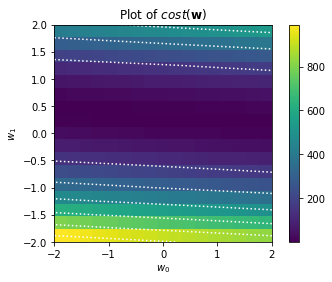

In [634]:
plt.imshow(costs, origin='lower', extent=(w0.min(), w0.max(), w1.min(), w1.max()))

#     sugar
plt.colorbar()
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.title('Plot of $cost(\\mathbf{w})$')
# plt.gca().set_aspect('equal')  # Force the x and y axes to scale

plt.contour(w0, w1, costs, colors='white', linestyles=':')


In [ ]:
# above is working, we can throw everything into a function

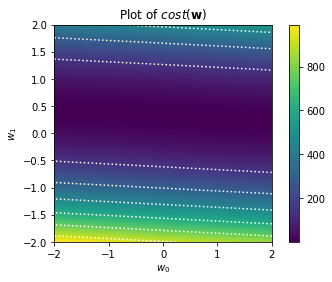

In [657]:
def plot(g):
    g2 = g*g
    steps = np.linspace(-2, 2, g)
    w0, w1 = np.meshgrid(steps, steps)
    w0_ = w0.ravel()
    w1_ = w1.ravel()
    w = np.column_stack([w0_, w1_])
    
    def calculateCostArray(X, y, i):
        return computeCost(X, y, w[i])
    
    def computeCost(X, y, w):
        t = X @ w - y
        t_squared = t * t   # vectorized. element wise squaring
        cost = 1/(2*len(X)) * sum(t_squared)
        return cost
    
    costs = np.zeros(g2)
    for i in range(g2):
        costs[i] = calculateCostArray(X_scaled_with_ones_col, y_scaled, i)
    
    costs = costs.reshape(g, g, -1)
    costs = costs.squeeze()
    
    plt.imshow(costs, origin='lower', extent=(w0.min(), w0.max(), w1.min(), w1.max()))

    plt.colorbar()
    plt.xlabel('$w_0$')
    plt.ylabel('$w_1$')
    plt.title('Plot of $cost(\\mathbf{w})$')
    plt.gca().set_aspect('equal')  # Force the x and y axes to scale
    

    plt.contour(w0, w1, costs, colors='white', linestyles=':')


plot(100)


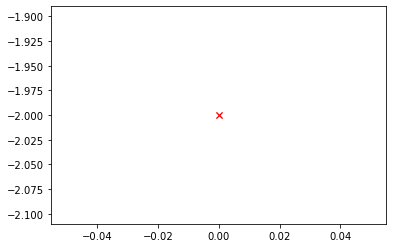

In [649]:
# w = np.array([1.84435245, 0.22949522])
w = np.array([[-2, -2]])

plt.plot(w, 'xr')

##### lots of errors below. going to backtrack and probably delete everything below

## Analytic Approach

since we only have 5 features, we can get an exact answer with an analytic approach. 

we have an excellent formula from the lab that does just that.

In [79]:
def linear_regression_by_direct_solve(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y  # very useful formula here.

In [83]:
linear_regression_by_direct_solve(X, y)

array([184435.24482113,    229.49521863])

these are the weights we should get with gradient descent.

## Gradient Descent Approach

### plotting the cost function

it would be too difficult to come up with a cost function by hand. 

it would be difficult to find an explicit cost function by hand. there are too many samples

instead, lets use another approach

feature engineer this first

In [420]:
X

array([[1.000e+00, 1.790e+03],
       [1.000e+00, 1.210e+03],
       [1.000e+00, 1.770e+03],
       [1.000e+00, 2.610e+03],
       [1.000e+00, 1.600e+03],
       [1.000e+00, 8.000e+02],
       [1.000e+00, 1.030e+03],
       [1.000e+00, 2.000e+03],
       [1.000e+00, 1.270e+03],
       [1.000e+00, 1.440e+03],
       [1.000e+00, 2.280e+03],
       [1.000e+00, 2.020e+03],
       [1.000e+00, 1.170e+03],
       [1.000e+00, 2.650e+03],
       [1.000e+00, 1.680e+03],
       [1.000e+00, 1.420e+03],
       [1.000e+00, 2.360e+03],
       [1.000e+00, 2.880e+03],
       [1.000e+00, 1.800e+03],
       [1.000e+00, 3.730e+03],
       [1.000e+00, 1.060e+03],
       [1.000e+00, 3.460e+03],
       [1.000e+00, 1.430e+03],
       [1.000e+00, 2.000e+03],
       [1.000e+00, 1.240e+03],
       [1.000e+00, 1.200e+03],
       [1.000e+00, 1.760e+03],
       [1.000e+00, 1.950e+03],
       [1.000e+00, 1.250e+03],
       [1.000e+00, 1.150e+03],
       [1.000e+00, 1.400e+03],
       [1.000e+00, 1.630e+03],
       [

In [423]:
mean = X.mean(axis=0)
mean

array([1.00000000e+00, 1.71780405e+03])

In [422]:
X - mean

array([[    0.        ,    72.19594595],
       [    0.        ,  -507.80405405],
       [    0.        ,    52.19594595],
       [    0.        ,   892.19594595],
       [    0.        ,  -117.80405405],
       [    0.        ,  -917.80405405],
       [    0.        ,  -687.80405405],
       [    0.        ,   282.19594595],
       [    0.        ,  -447.80405405],
       [    0.        ,  -277.80405405],
       [    0.        ,   562.19594595],
       [    0.        ,   302.19594595],
       [    0.        ,  -547.80405405],
       [    0.        ,   932.19594595],
       [    0.        ,   -37.80405405],
       [    0.        ,  -297.80405405],
       [    0.        ,   642.19594595],
       [    0.        ,  1162.19594595],
       [    0.        ,    82.19594595],
       [    0.        ,  2012.19594595],
       [    0.        ,  -657.80405405],
       [    0.        ,  1742.19594595],
       [    0.        ,  -287.80405405],
       [    0.        ,   282.19594595],
       [    0.  

In [432]:
std = X.std(axis=0)
std

array([  0.        , 641.49061693])

In [437]:
X_norm = (X - mean) / std[1]
X_norm

array([[ 0.        ,  0.11254404],
       [ 0.        , -0.79160013],
       [ 0.        ,  0.08136666],
       [ 0.        ,  1.39081683],
       [ 0.        , -0.18364112],
       [ 0.        , -1.43073652],
       [ 0.        , -1.07219659],
       [ 0.        ,  0.43990658],
       [ 0.        , -0.69806797],
       [ 0.        , -0.4330602 ],
       [ 0.        ,  0.87638998],
       [ 0.        ,  0.47108397],
       [ 0.        , -0.8539549 ],
       [ 0.        ,  1.4531716 ],
       [ 0.        , -0.05893158],
       [ 0.        , -0.46423758],
       [ 0.        ,  1.00109952],
       [ 0.        ,  1.81171153],
       [ 0.        ,  0.12813273],
       [ 0.        ,  3.13675039],
       [ 0.        , -1.02543052],
       [ 0.        ,  2.7158557 ],
       [ 0.        , -0.44864889],
       [ 0.        ,  0.43990658],
       [ 0.        , -0.74483405],
       [ 0.        , -0.80718882],
       [ 0.        ,  0.06577796],
       [ 0.        ,  0.36196312],
       [ 0.        ,

In [438]:
type(X_norm)

numpy.ndarray

In [443]:
X_ = X_norm[:, 1]
X_

array([ 0.11254404, -0.79160013,  0.08136666,  1.39081683, -0.18364112,
       -1.43073652, -1.07219659,  0.43990658, -0.69806797, -0.4330602 ,
        0.87638998,  0.47108397, -0.8539549 ,  1.4531716 , -0.05893158,
       -0.46423758,  1.00109952,  1.81171153,  0.12813273,  3.13675039,
       -1.02543052,  2.7158557 , -0.44864889,  0.43990658, -0.74483405,
       -0.80718882,  0.06577796,  0.36196312, -0.72924536, -0.88513228,
       -0.49541497, -0.13687504, -0.71365666, -0.49541497, -0.46423758,
       -0.46423758,  0.09695535, -0.26158458, -0.79160013,  0.48667266,
       -0.09010896, -0.47982628,  2.51320269, -1.16572875, -1.19690613,
       -0.69806797,  0.72050305,  0.42431789, -0.05893158, -0.27717327,
        0.37755181, -0.51100366,  0.4087292 ,  0.26843097,  0.56461612,
        0.98551082, -0.33952804, -0.52659235, -0.66689059,  1.79612284,
       -1.39955914, -0.04334289, -0.52659235, -0.52659235,  0.53343874,
        0.93874475, -0.72924536, -1.39955914, -0.99425313, -0.46

In [445]:
ones = np.ones(len(X_))
len(ones)

148

In [447]:
X = np.column_stack((ones, X_))
X

array([[ 1.        ,  0.11254404],
       [ 1.        , -0.79160013],
       [ 1.        ,  0.08136666],
       [ 1.        ,  1.39081683],
       [ 1.        , -0.18364112],
       [ 1.        , -1.43073652],
       [ 1.        , -1.07219659],
       [ 1.        ,  0.43990658],
       [ 1.        , -0.69806797],
       [ 1.        , -0.4330602 ],
       [ 1.        ,  0.87638998],
       [ 1.        ,  0.47108397],
       [ 1.        , -0.8539549 ],
       [ 1.        ,  1.4531716 ],
       [ 1.        , -0.05893158],
       [ 1.        , -0.46423758],
       [ 1.        ,  1.00109952],
       [ 1.        ,  1.81171153],
       [ 1.        ,  0.12813273],
       [ 1.        ,  3.13675039],
       [ 1.        , -1.02543052],
       [ 1.        ,  2.7158557 ],
       [ 1.        , -0.44864889],
       [ 1.        ,  0.43990658],
       [ 1.        , -0.74483405],
       [ 1.        , -0.80718882],
       [ 1.        ,  0.06577796],
       [ 1.        ,  0.36196312],
       [ 1.        ,

In [453]:
len(X)

148

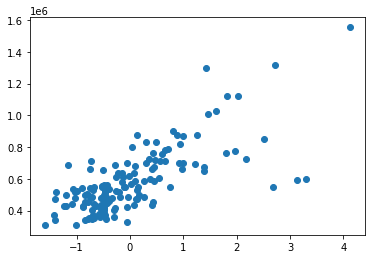

In [454]:
plt.scatter(X[:, 1], y)

### y normalized

In [455]:
y

array([ 475000.    ,  452000.    ,  436110.    ,  650000.    ,
        485000.    ,  370000.    ,  535000.    ,  677000.    ,
        531000.    ,  445000.    ,  875000.    ,  720000.    ,
        499000.    , 1008000.    ,  700000.    ,  371000.    ,
        702500.    , 1125000.    ,  875000.    ,  595000.    ,
        480000.    , 1315000.    ,  485000.    ,  585000.    ,
        543000.    ,  504200.    ,  640000.    ,  725000.    ,
        712000.    ,  425000.    ,  563500.    ,  609000.    ,
        485000.    ,  474800.    ,  523950.    ,  510000.    ,
        586500.    ,  526000.    ,  500000.    ,  831000.    ,
        550607.1429,  500000.    ,  850000.    ,  690000.    ,
        500000.    ,  355000.    ,  785000.    ,  760500.    ,
        330000.    ,  690000.    ,  599000.    ,  657100.    ,
        660000.    ,  486895.    ,  715000.    ,  870300.    ,
        480000.    ,  482000.    ,  440000.    ,  765000.    ,
        475000.    ,  487250.    ,  552000.    ,  54900

In [458]:
y_mean = y.mean()
y_mean

578663.0617763513

In [460]:
y_std = y.std()
y_std

202385.06464608165

In [472]:
y = (y - y_mean) / y_std
y

array([-0.51220707, -0.62585182, -0.70436552,  0.35248124, -0.46279631,
       -1.03102006, -0.21574251,  0.48589029, -0.23550681, -0.66043936,
        1.46422335,  0.69835656, -0.39362125,  2.12138647,  0.59953504,
       -1.02607899,  0.61188773,  2.69949237,  1.46422335,  0.08072205,
       -0.48750169,  3.63829683, -0.46279631,  0.03131129, -0.1762139 ,
       -0.36792765,  0.30307048,  0.72306194,  0.65882795, -0.75926088,
       -0.07492184,  0.14989712, -0.46279631, -0.51319529, -0.2703414 ,
       -0.33926941,  0.03872291, -0.26021219, -0.38868017,  1.24681601,
       -0.13862643, -0.38868017,  1.34069645,  0.55012428, -0.38868017,
       -1.1051362 ,  1.01952651,  0.89847014, -1.2286631 ,  0.55012428,
        0.10048636,  0.38756288,  0.401892  , -0.45343297,  0.67365118,
        1.4410003 , -0.48750169, -0.47761954, -0.68514474,  0.92070499,
       -0.51220707, -0.45167889, -0.13174422, -0.14656744,  0.13013282,
        1.20481686, -0.48750169, -1.1794994 , -0.26515327, -0.61

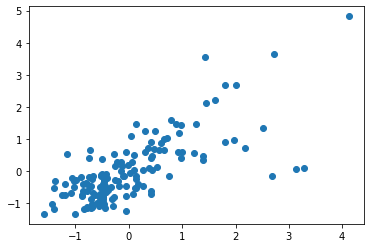

In [462]:
plt.scatter(X[:, 1], y_norm)

### Plotting Cost

In [464]:
def eval_grid(func, gridsize):
    steps = np.linspace(-5, 5, 9)
    x1, x2 = np.meshgrid(steps, steps)
    x1_ = x1.ravel()
    x2_ = x2.ravel()
    x = np.column_stack([x1_, x2_])
    y = func(x)
    y = y.reshape(9,9,-1)
    y = y.squeeze()
    return x, x1, x2, y

array([-5.  , -3.75, -2.5 , -1.25,  0.  ,  1.25,  2.5 ,  3.75,  5.  ])

### Errors below

In [477]:
w = np.array([0, 1])
w.shape

(2,)

In [469]:
X.round(2)

array([[ 1.  ,  0.11],
       [ 1.  , -0.79],
       [ 1.  ,  0.08],
       [ 1.  ,  1.39],
       [ 1.  , -0.18],
       [ 1.  , -1.43],
       [ 1.  , -1.07],
       [ 1.  ,  0.44],
       [ 1.  , -0.7 ],
       [ 1.  , -0.43],
       [ 1.  ,  0.88],
       [ 1.  ,  0.47],
       [ 1.  , -0.85],
       [ 1.  ,  1.45],
       [ 1.  , -0.06],
       [ 1.  , -0.46],
       [ 1.  ,  1.  ],
       [ 1.  ,  1.81],
       [ 1.  ,  0.13],
       [ 1.  ,  3.14],
       [ 1.  , -1.03],
       [ 1.  ,  2.72],
       [ 1.  , -0.45],
       [ 1.  ,  0.44],
       [ 1.  , -0.74],
       [ 1.  , -0.81],
       [ 1.  ,  0.07],
       [ 1.  ,  0.36],
       [ 1.  , -0.73],
       [ 1.  , -0.89],
       [ 1.  , -0.5 ],
       [ 1.  , -0.14],
       [ 1.  , -0.71],
       [ 1.  , -0.5 ],
       [ 1.  , -0.46],
       [ 1.  , -0.46],
       [ 1.  ,  0.1 ],
       [ 1.  , -0.26],
       [ 1.  , -0.79],
       [ 1.  ,  0.49],
       [ 1.  , -0.09],
       [ 1.  , -0.48],
       [ 1.  ,  2.51],
       [ 1.

In [470]:
len(X)

148

In [475]:
y.shape

(148,)

In [474]:
y.round(2)

array([-0.51, -0.63, -0.7 ,  0.35, -0.46, -1.03, -0.22,  0.49, -0.24,
       -0.66,  1.46,  0.7 , -0.39,  2.12,  0.6 , -1.03,  0.61,  2.7 ,
        1.46,  0.08, -0.49,  3.64, -0.46,  0.03, -0.18, -0.37,  0.3 ,
        0.72,  0.66, -0.76, -0.07,  0.15, -0.46, -0.51, -0.27, -0.34,
        0.04, -0.26, -0.39,  1.25, -0.14, -0.39,  1.34,  0.55, -0.39,
       -1.11,  1.02,  0.9 , -1.23,  0.55,  0.1 ,  0.39,  0.4 , -0.45,
        0.67,  1.44, -0.49, -0.48, -0.69,  0.92, -0.51, -0.45, -0.13,
       -0.15,  0.13,  1.2 , -0.49, -1.18, -0.27, -0.61,  0.17,  0.99,
        0.5 ,  0.01,  0.97,  3.55,  0.89,  1.59,  2.23,  0.2 , -0.39,
       -0.49,  1.09, -0.09,  1.46,  4.82, -1.09, -1.15, -0.14, -0.53,
       -0.05, -0.46, -1.13,  0.04, -0.15, -0.68,  0.4 , -0.23,  1.27,
        0.6 ,  0.4 , -0.15, -0.3 ,  0.28, -0.14, -0.16, -0.64,  2.7 ,
       -0.2 ,  0.3 , -0.75,  0.72, -0.61,  0.6 , -0.29, -0.31,  0.65,
       -0.86, -0.72, -0.74, -0.73, -1.11, -0.85, -1.01,  0.11, -1.08,
       -1.03, -0.79,

In [478]:
X @ w

array([ 0.11254404, -0.79160013,  0.08136666,  1.39081683, -0.18364112,
       -1.43073652, -1.07219659,  0.43990658, -0.69806797, -0.4330602 ,
        0.87638998,  0.47108397, -0.8539549 ,  1.4531716 , -0.05893158,
       -0.46423758,  1.00109952,  1.81171153,  0.12813273,  3.13675039,
       -1.02543052,  2.7158557 , -0.44864889,  0.43990658, -0.74483405,
       -0.80718882,  0.06577796,  0.36196312, -0.72924536, -0.88513228,
       -0.49541497, -0.13687504, -0.71365666, -0.49541497, -0.46423758,
       -0.46423758,  0.09695535, -0.26158458, -0.79160013,  0.48667266,
       -0.09010896, -0.47982628,  2.51320269, -1.16572875, -1.19690613,
       -0.69806797,  0.72050305,  0.42431789, -0.05893158, -0.27717327,
        0.37755181, -0.51100366,  0.4087292 ,  0.26843097,  0.56461612,
        0.98551082, -0.33952804, -0.52659235, -0.66689059,  1.79612284,
       -1.39955914, -0.04334289, -0.52659235, -0.52659235,  0.53343874,
        0.93874475, -0.72924536, -1.39955914, -0.99425313, -0.46

In [479]:
test = X @ w - y
test

array([ 6.24751114e-01, -1.65748304e-01,  7.85732178e-01,  1.03833559e+00,
        2.79155195e-01, -3.99716460e-01, -8.56454084e-01, -4.59837084e-02,
       -4.62561158e-01,  2.27379157e-01, -5.87833379e-01, -2.27272594e-01,
       -4.60333649e-01, -6.68214872e-01, -6.58466620e-01,  5.61841401e-01,
        3.89211784e-01, -8.87780844e-01, -1.33609062e+00,  3.05602834e+00,
       -5.37928822e-01, -9.22441129e-01,  1.41474220e-02,  4.08595290e-01,
       -5.68620149e-01, -4.39261167e-01, -2.37292515e-01, -3.61098822e-01,
       -1.38807331e+00, -1.25871405e-01, -4.20493127e-01, -2.86772160e-01,
       -2.50860351e-01,  1.77803202e-02, -1.93896184e-01, -1.24968172e-01,
        5.82324400e-02, -1.37238635e-03, -4.02919955e-01, -7.60143346e-01,
        4.85174667e-02, -9.11461042e-02,  1.17250624e+00, -1.71585303e+00,
       -8.08225961e-01,  4.07068230e-01, -2.99023458e-01, -4.74152253e-01,
        1.16973153e+00, -8.27297554e-01,  2.77065455e-01, -8.98566540e-01,
        6.83719976e-03,  

In [480]:
test.shape

(148,)

In [481]:
test_squared = test*test

In [482]:
sum(test_squared)

80.68355471968484

In [483]:
test_squared[0]  # matches my hand calc

0.3903139549734759

In [484]:
cost = 1/(2*len(X)) * sum(test_squared)
cost  # matches hand calculation

0.272579576755692

### ok so lets automate this, with a function

In [485]:
def computeCost(X, y, w):
    t = X @ w - y
    t_squared = t * t   # vectorized. element wise squaring
    cost = 1/(2*len(X)) * sum(t_squared)
    return cost

In [486]:
computeCost(X, y, w)  # sweet.

0.272579576755692

## Plotting

so what we're going to have to do is, follow the steps to make a mesh grid

once we have our mesh points, we feed it into our computeCost functions to get a bunch of costs. 

we're going to cheat a little bit here, since we know the slopes, we're going to make our mesh around that area

In [530]:
steps = np.linspace(-5, 5, 9)
steps

array([-5.  , -3.75, -2.5 , -1.25,  0.  ,  1.25,  2.5 ,  3.75,  5.  ])

In [492]:
w1, w2 = np.meshgrid(steps, steps)
w1.shape


(9, 9)

In [493]:
w1

array([[-5.  , -3.75, -2.5 , -1.25,  0.  ,  1.25,  2.5 ,  3.75,  5.  ],
       [-5.  , -3.75, -2.5 , -1.25,  0.  ,  1.25,  2.5 ,  3.75,  5.  ],
       [-5.  , -3.75, -2.5 , -1.25,  0.  ,  1.25,  2.5 ,  3.75,  5.  ],
       [-5.  , -3.75, -2.5 , -1.25,  0.  ,  1.25,  2.5 ,  3.75,  5.  ],
       [-5.  , -3.75, -2.5 , -1.25,  0.  ,  1.25,  2.5 ,  3.75,  5.  ],
       [-5.  , -3.75, -2.5 , -1.25,  0.  ,  1.25,  2.5 ,  3.75,  5.  ],
       [-5.  , -3.75, -2.5 , -1.25,  0.  ,  1.25,  2.5 ,  3.75,  5.  ],
       [-5.  , -3.75, -2.5 , -1.25,  0.  ,  1.25,  2.5 ,  3.75,  5.  ],
       [-5.  , -3.75, -2.5 , -1.25,  0.  ,  1.25,  2.5 ,  3.75,  5.  ]])

In [494]:
w2

array([[-5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  ],
       [-3.75, -3.75, -3.75, -3.75, -3.75, -3.75, -3.75, -3.75, -3.75],
       [-2.5 , -2.5 , -2.5 , -2.5 , -2.5 , -2.5 , -2.5 , -2.5 , -2.5 ],
       [-1.25, -1.25, -1.25, -1.25, -1.25, -1.25, -1.25, -1.25, -1.25],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 1.25,  1.25,  1.25,  1.25,  1.25,  1.25,  1.25,  1.25,  1.25],
       [ 2.5 ,  2.5 ,  2.5 ,  2.5 ,  2.5 ,  2.5 ,  2.5 ,  2.5 ,  2.5 ],
       [ 3.75,  3.75,  3.75,  3.75,  3.75,  3.75,  3.75,  3.75,  3.75],
       [ 5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ]])

In [495]:
w1_ = w1.ravel()
w1_

array([-5.  , -3.75, -2.5 , -1.25,  0.  ,  1.25,  2.5 ,  3.75,  5.  ,
       -5.  , -3.75, -2.5 , -1.25,  0.  ,  1.25,  2.5 ,  3.75,  5.  ,
       -5.  , -3.75, -2.5 , -1.25,  0.  ,  1.25,  2.5 ,  3.75,  5.  ,
       -5.  , -3.75, -2.5 , -1.25,  0.  ,  1.25,  2.5 ,  3.75,  5.  ,
       -5.  , -3.75, -2.5 , -1.25,  0.  ,  1.25,  2.5 ,  3.75,  5.  ,
       -5.  , -3.75, -2.5 , -1.25,  0.  ,  1.25,  2.5 ,  3.75,  5.  ,
       -5.  , -3.75, -2.5 , -1.25,  0.  ,  1.25,  2.5 ,  3.75,  5.  ,
       -5.  , -3.75, -2.5 , -1.25,  0.  ,  1.25,  2.5 ,  3.75,  5.  ,
       -5.  , -3.75, -2.5 , -1.25,  0.  ,  1.25,  2.5 ,  3.75,  5.  ])

In [496]:
w1_.shape

(81,)

In [497]:
w2_ = w2.ravel()

In [498]:
w = np.column_stack([w1_, w2_])
w

array([[-5.  , -5.  ],
       [-3.75, -5.  ],
       [-2.5 , -5.  ],
       [-1.25, -5.  ],
       [ 0.  , -5.  ],
       [ 1.25, -5.  ],
       [ 2.5 , -5.  ],
       [ 3.75, -5.  ],
       [ 5.  , -5.  ],
       [-5.  , -3.75],
       [-3.75, -3.75],
       [-2.5 , -3.75],
       [-1.25, -3.75],
       [ 0.  , -3.75],
       [ 1.25, -3.75],
       [ 2.5 , -3.75],
       [ 3.75, -3.75],
       [ 5.  , -3.75],
       [-5.  , -2.5 ],
       [-3.75, -2.5 ],
       [-2.5 , -2.5 ],
       [-1.25, -2.5 ],
       [ 0.  , -2.5 ],
       [ 1.25, -2.5 ],
       [ 2.5 , -2.5 ],
       [ 3.75, -2.5 ],
       [ 5.  , -2.5 ],
       [-5.  , -1.25],
       [-3.75, -1.25],
       [-2.5 , -1.25],
       [-1.25, -1.25],
       [ 0.  , -1.25],
       [ 1.25, -1.25],
       [ 2.5 , -1.25],
       [ 3.75, -1.25],
       [ 5.  , -1.25],
       [-5.  ,  0.  ],
       [-3.75,  0.  ],
       [-2.5 ,  0.  ],
       [-1.25,  0.  ],
       [ 0.  ,  0.  ],
       [ 1.25,  0.  ],
       [ 2.5 ,  0.  ],
       [ 3.

In [499]:
w.shape

(81, 2)

In [500]:
w[0]

array([-5., -5.])

In [527]:
costs = computeCost(X, y, w[0])
costs

29.137102116221538

In [504]:
costs = computeCost(X, y, w[0])
costs

29.137102116221538

In [505]:
X

array([[ 1.        ,  0.11254404],
       [ 1.        , -0.79160013],
       [ 1.        ,  0.08136666],
       [ 1.        ,  1.39081683],
       [ 1.        , -0.18364112],
       [ 1.        , -1.43073652],
       [ 1.        , -1.07219659],
       [ 1.        ,  0.43990658],
       [ 1.        , -0.69806797],
       [ 1.        , -0.4330602 ],
       [ 1.        ,  0.87638998],
       [ 1.        ,  0.47108397],
       [ 1.        , -0.8539549 ],
       [ 1.        ,  1.4531716 ],
       [ 1.        , -0.05893158],
       [ 1.        , -0.46423758],
       [ 1.        ,  1.00109952],
       [ 1.        ,  1.81171153],
       [ 1.        ,  0.12813273],
       [ 1.        ,  3.13675039],
       [ 1.        , -1.02543052],
       [ 1.        ,  2.7158557 ],
       [ 1.        , -0.44864889],
       [ 1.        ,  0.43990658],
       [ 1.        , -0.74483405],
       [ 1.        , -0.80718882],
       [ 1.        ,  0.06577796],
       [ 1.        ,  0.36196312],
       [ 1.        ,

In [503]:
y

array([-0.51220707, -0.62585182, -0.70436552,  0.35248124, -0.46279631,
       -1.03102006, -0.21574251,  0.48589029, -0.23550681, -0.66043936,
        1.46422335,  0.69835656, -0.39362125,  2.12138647,  0.59953504,
       -1.02607899,  0.61188773,  2.69949237,  1.46422335,  0.08072205,
       -0.48750169,  3.63829683, -0.46279631,  0.03131129, -0.1762139 ,
       -0.36792765,  0.30307048,  0.72306194,  0.65882795, -0.75926088,
       -0.07492184,  0.14989712, -0.46279631, -0.51319529, -0.2703414 ,
       -0.33926941,  0.03872291, -0.26021219, -0.38868017,  1.24681601,
       -0.13862643, -0.38868017,  1.34069645,  0.55012428, -0.38868017,
       -1.1051362 ,  1.01952651,  0.89847014, -1.2286631 ,  0.55012428,
        0.10048636,  0.38756288,  0.401892  , -0.45343297,  0.67365118,
        1.4410003 , -0.48750169, -0.47761954, -0.68514474,  0.92070499,
       -0.51220707, -0.45167889, -0.13174422, -0.14656744,  0.13013282,
        1.20481686, -0.48750169, -1.1794994 , -0.26515327, -0.61

my vectorized code is being difficult. I can do this manually with for loops

In [508]:
def calculateCostArray(i):
    return computeCost(X, y, w[i])

In [509]:
a = calculateCostArray(0)
a

29.137102116221538

In [510]:
type(a)

numpy.float64

In [277]:
## debugging area

In [515]:
costs = np.zeros(81)
costs.shape

(81,)

In [516]:
for i in range(len(w)):
    costs[i] = calculateCostArray(i)

In [280]:
## ok it worked, debugging end

In [517]:
costs

array([29.13710212, 23.66835212, 19.76210212, 17.41835212, 16.63710212,
       17.41835212, 19.76210212, 23.66835212, 29.13710212, 22.75907659,
       17.29032659, 13.38407659, 11.04032659, 10.25907659, 11.04032659,
       13.38407659, 17.29032659, 22.75907659, 17.94355106, 12.47480106,
        8.56855106,  6.22480106,  5.44355106,  6.22480106,  8.56855106,
       12.47480106, 17.94355106, 14.69052553,  9.22177553,  5.31552553,
        2.97177553,  2.19052553,  2.97177553,  5.31552553,  9.22177553,
       14.69052553, 13.        ,  7.53125   ,  3.625     ,  1.28125   ,
        0.5       ,  1.28125   ,  3.625     ,  7.53125   , 13.        ,
       12.87197447,  7.40322447,  3.49697447,  1.15322447,  0.37197447,
        1.15322447,  3.49697447,  7.40322447, 12.87197447, 14.30644894,
        8.83769894,  4.93144894,  2.58769894,  1.80644894,  2.58769894,
        4.93144894,  8.83769894, 14.30644894, 17.30342341, 11.83467341,
        7.92842341,  5.58467341,  4.80342341,  5.58467341,  7.92

In [518]:
costs.shape

(81,)

In [519]:
costs = costs.reshape(9, 9, -1)

In [520]:
costs.shape

(9, 9, 1)

In [521]:
costs = costs.squeeze()

In [522]:
costs

array([[29.13710212, 23.66835212, 19.76210212, 17.41835212, 16.63710212,
        17.41835212, 19.76210212, 23.66835212, 29.13710212],
       [22.75907659, 17.29032659, 13.38407659, 11.04032659, 10.25907659,
        11.04032659, 13.38407659, 17.29032659, 22.75907659],
       [17.94355106, 12.47480106,  8.56855106,  6.22480106,  5.44355106,
         6.22480106,  8.56855106, 12.47480106, 17.94355106],
       [14.69052553,  9.22177553,  5.31552553,  2.97177553,  2.19052553,
         2.97177553,  5.31552553,  9.22177553, 14.69052553],
       [13.        ,  7.53125   ,  3.625     ,  1.28125   ,  0.5       ,
         1.28125   ,  3.625     ,  7.53125   , 13.        ],
       [12.87197447,  7.40322447,  3.49697447,  1.15322447,  0.37197447,
         1.15322447,  3.49697447,  7.40322447, 12.87197447],
       [14.30644894,  8.83769894,  4.93144894,  2.58769894,  1.80644894,
         2.58769894,  4.93144894,  8.83769894, 14.30644894],
       [17.30342341, 11.83467341,  7.92842341,  5.58467341,  4

In [523]:
costs.shape

(9, 9)

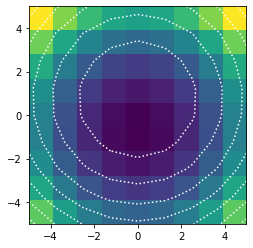

In [524]:
plt.imshow(costs, extent=(w1.min(), w1.max(), w2.min(), w2.max()))
plt.gca().set_aspect('equal')
plt.contour(w1, w2, costs, colors='white', linestyles=':')

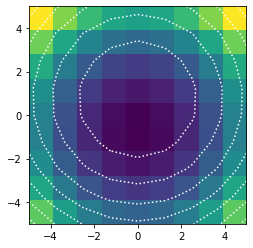

In [529]:
def plotCostFunction_contour(w1_min, w1_max, w2_min, w2_max):
    steps0 = np.linspace(w1_min, w1_max, 9)  # from AA, we need 184435
    steps1 = np.linspace(w2_min, w2_max, 9)  # rememner, from AA, we know we need to get 229

    w1, w2 = np.meshgrid(steps0, steps1)
    w1_ = w1.ravel()
    w2_ = w2.ravel()
    w = np.column_stack([w1_, w2_])
    
    
    costs = np.zeros(len(w))
    
    for i in range(len(w)):
        costs[i] = calculateCostArray(i)
    
    costs = costs.reshape(9, 9, -1)
    costs = costs.squeeze()
    
    plt.imshow(costs, extent=(w1.min(), w1.max(), w2.min(), w2.max()))
    plt.gca().set_aspect('equal')
    plt.contour(w1, w2, costs, colors='white', linestyles=':')
    
plotCostFunction_contour(-5, 5, -5, 5)

# function writing space